In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("D:\model_with_flask\dataset.csv")

C:\Users\bhati\AppData\Local\Temp\ipykernel_25056\3616267512.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,111,688,409,0
1,1,0.067,2,0,0,0,0,58,353,456,0
2,1,0.000,0,0,0,0,0,44,535,364,0
3,1,0.000,2,14,0,0,1,81,3109,298,0
4,1,0.000,2,0,0,0,1,498,1071,1999,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.308,1,0,0,0,0,0,87,4609,1
996,1,0.000,3,75,0,0,0,1,103,159,1
997,1,0.000,1,0,0,0,0,0,88,322,1
998,0,0.000,1,0,0,0,0,0,929,1315,1


In [3]:
X=df.iloc[:, 0:10].values
X[0]

array([  1.,   0.,   2.,  42.,   1.,   0.,   0., 111., 688., 409.])

In [4]:
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [5]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

670 670
330 330


In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
print(clf.fit(X_train, y_train))

DecisionTreeClassifier()


In [8]:
print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

TRAIN SET 1.0
TEST  SET 0.9606060606060606


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y.values.ravel(), cv=4)
scores

array([0.972, 0.96 , 0.964, 0.88 ])

In [10]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.94 (+/- 0.07)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [12]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Real','Fake']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[157   8]
 [  5 160]]


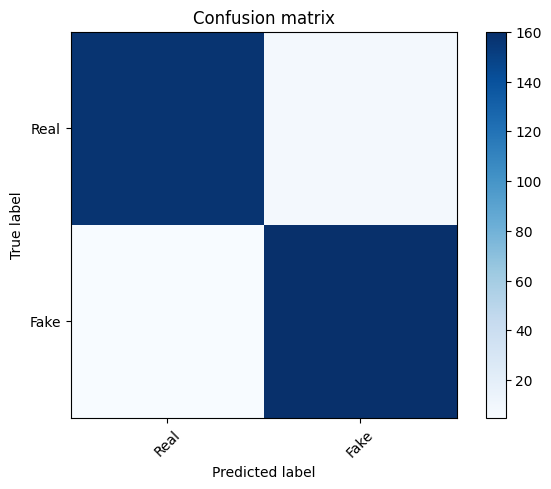

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [14]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.04848485 1.        ]
True Positive rate:  [0.         0.96969697 1.        ]


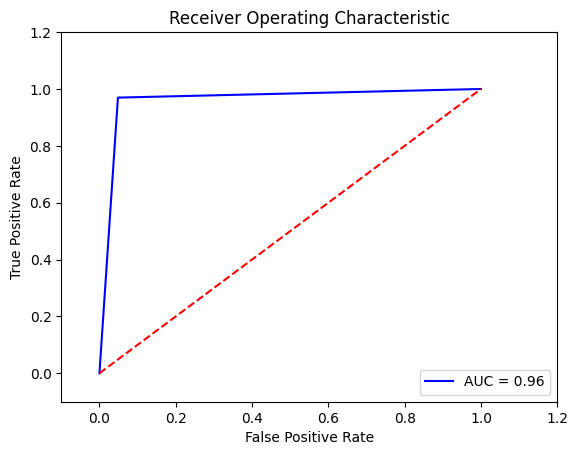

In [15]:
plot_roc_curve(y_test, clf.predict(X_test))

In [16]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       165
           1       0.95      0.97      0.96       165

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



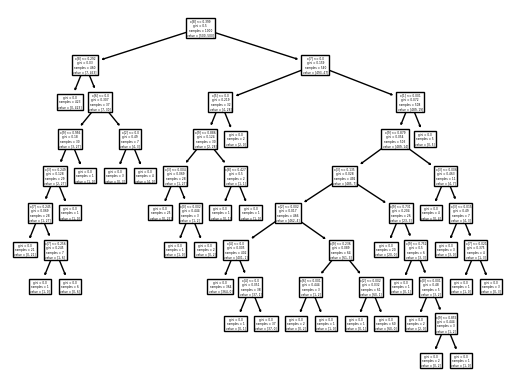

In [17]:
tree.plot_tree(clf.fit(X,y)) 
fig = clf.fit(X,y)
tree.plot_tree(fig)
plt.rcParams["figure.figsize"] = [60,60]
plt.show()